Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading csv file

In [2]:
df=pd.read_csv("IMDB_Movies.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Analyzing columns 

In [3]:
df.shape

(5043, 28)

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

data cleaning

In [5]:
# these are the only necessary columns used in analysis . so we remove the other  remaining columns
df=df[['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score']]
df.sample(3)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score
1708,Terry Gilliam,292.0,7689458.0,Adventure|Fantasy|Mystery,Andrew Garfield,The Imaginarium of Doctor Parnassus,126307,210,English,40000000.0,2009.0,6.8
4063,Charles Martin Smith,35.0,24629916.0,Comedy|Drama|Family|Sport,Kevin Zegers,Air Bud,12942,34,English,3000000.0,1997.0,5.1
4593,Vivek Agnihotri,4.0,49000.0,Thriller,Emraan Hashmi,Chocolate: Deep Dark Secrets,1524,30,Hindi,1500000.0,2005.0,4.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4939 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   gross                   4159 non-null   float64
 3   genres                  5043 non-null   object 
 4   actor_1_name            5036 non-null   object 
 5   movie_title             5043 non-null   object 
 6   num_voted_users         5043 non-null   int64  
 7   num_user_for_reviews    5023 non-null   object 
 8   language                5031 non-null   object 
 9   budget                  4551 non-null   float64
 10  title_year              4935 non-null   float64
 11  imdb_score              5043 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 472.9+ KB


check duplicate

In [7]:
# these rows are duplicate
df[df.duplicated()]

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score
137,David Yates,248.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,239,English,180000000.0,2016.0,6.6
187,Bill Condon,322.0,292298923.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,329,English,120000000.0,2012.0,5.5
204,Hideaki Anno,1.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,13,Japanese,NaN,2016.0,8.2
303,Joe Wright,256.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,186,English,150000000.0,2015.0,5.8
389,Josh Trank,369.0,56114221.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,695,English,120000000.0,2015.0,4.3
395,Rob Cohen,187.0,144512310.0,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272223,988,English,38000000.0,2001.0,6.7
590,Brett Ratner,245.0,72660029.0,Action|Adventure,Dwayne Johnson,Hercules,115687,269,English,100000000.0,2014.0,6.0
656,Paul Verhoeven,196.0,119412921.0,Action|Sci-Fi,Ronny Cox,Total Recall,240241,391,English,65000000.0,1990.0,7.5
794,Joss Whedon,703.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220000000.0,2012.0,8.1
1220,Angelina Jolie Pitt,322.0,115603980.0,Biography|Drama|Sport|War,Finn Wittrock,Unbroken,103589,351,English,65000000.0,2014.0,7.2


In [8]:
# droping duplicate
df=df.drop_duplicates()
df.shape

(4996, 12)

In [9]:
# checking the percentage of null values in the dataset
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

gross                     17.47
budget                     9.73
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.98
num_user_for_reviews       0.40
language                   0.24
actor_1_name               0.14
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
dtype: float64

In [10]:
# removing rows that have high percentage of null value
df=df[df['gross'].notnull()]
df=df[df['budget'].notnull()]

In [11]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
dtype: float64

In [12]:
# now we have only 3 columns that have null value . Thus , we fill those null value one by one

filling null values

In [13]:
# replace actor_1_name null value with unknown
df['actor_1_name'].replace(np.NaN,'Unknown',inplace=True)

In [14]:
df.language.value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [15]:
# we can clearly see that english is max language .so we replace na values in laguage with english
df['language'].replace(np.NaN,'English',inplace=True)

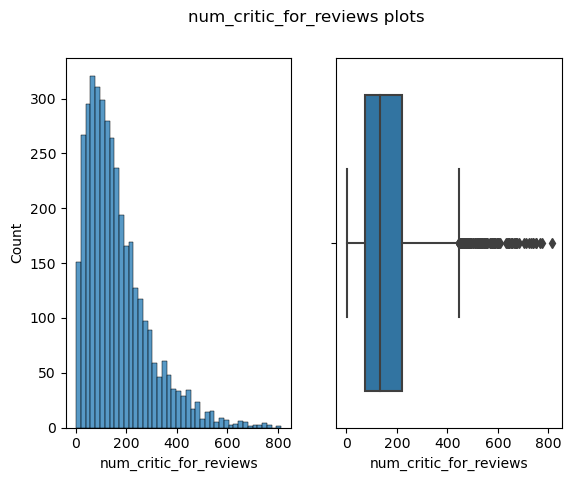

In [16]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('num_critic_for_reviews plots')
sns.histplot(ax=axes[0],data=df,x='num_critic_for_reviews')
sns.boxplot(ax=axes[1],data=df,x='num_critic_for_reviews')
plt.show()

from first graph we can clearly see the distribution fo num_critic_for_reviews and
from 2 boxplot we see that outliers are present in this cloumns 
,so filling na values  with mean is not good here.Here best way to fill na values is median() based on plots

In [17]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median(),inplace=True)


In [18]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

director_name             0.0
num_critic_for_reviews    0.0
gross                     0.0
genres                    0.0
actor_1_name              0.0
movie_title               0.0
num_voted_users           0.0
num_user_for_reviews      0.0
language                  0.0
budget                    0.0
title_year                0.0
imdb_score                0.0
dtype: float64

Now, My final data  don,t have any na values .Hence it  is perfectly cleaned and ready for analysis .Further analysis is done in excel

saving file after data cleaning

In [19]:
df.to_excel("Cleaned_IMDB_Movies.xlsx",index=False)